In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('/content/uber.csv')

data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0


In [ ]:
# 1.
# Drop unnecessary columns
data = data.drop(['Unnamed: 0', 'key'], axis=1)

# Check for missing values
data = data.dropna()

In [ ]:
# 1. Convert pickup_datetime to datetime format and extract features
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['year'] = data['pickup_datetime'].dt.year
data['month'] = data['pickup_datetime'].dt.month
data['day'] = data['pickup_datetime'].dt.day
data['hour'] = data['pickup_datetime'].dt.hour

data = data.drop(['pickup_datetime'], axis=1) # dropped the pickup_datetime column


In [ ]:
data

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,2015.0,5.0,7.0,19.0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2009.0,7.0,17.0,20.0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,2009.0,8.0,24.0,21.0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,2009.0,6.0,26.0,8.0
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5.0,2014.0,8.0,28.0,17.0
...,...,...,...,...,...,...,...,...,...,...
17842,12.1,-73.986340,40.736397,-73.949473,40.724408,1.0,2009.0,9.0,24.0,23.0
17843,18.1,-73.949998,40.780385,-74.005577,40.709002,2.0,2012.0,4.0,14.0,2.0
17844,26.5,-73.982980,40.762627,-73.872748,40.774345,5.0,2009.0,2.0,19.0,7.0
17845,4.9,-73.962850,40.804438,-73.952757,40.818113,1.0,2012.0,5.0,4.0,3.0


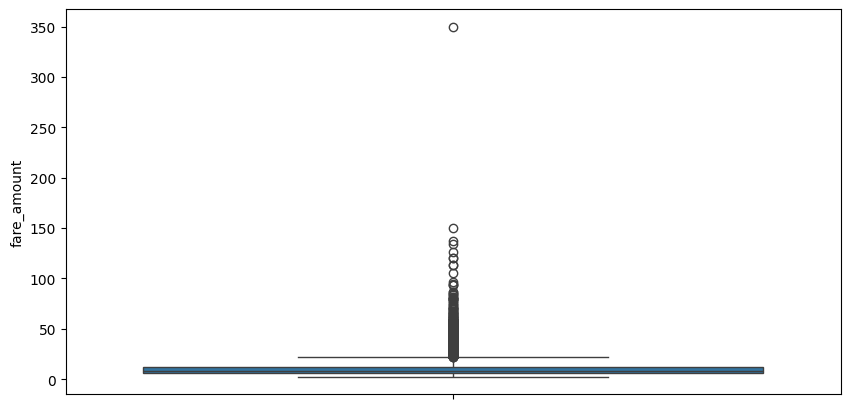

In [ ]:
# 2. Visualize outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data['fare_amount'])
plt.show()


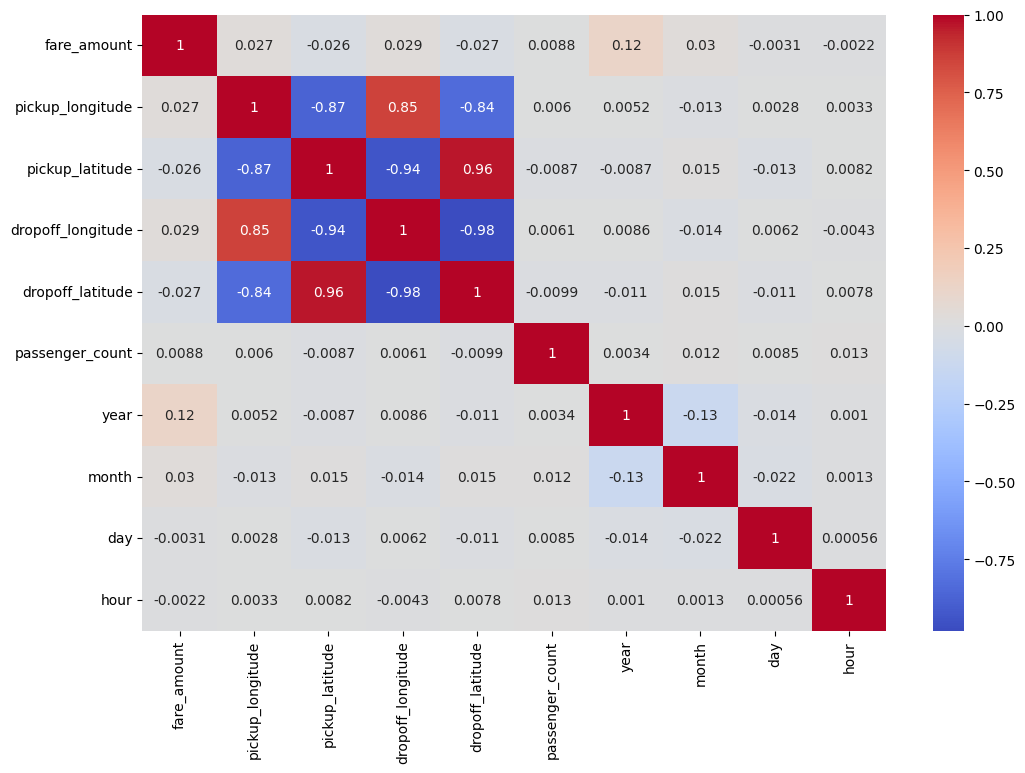

In [ ]:
# 3. Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
# 4.
# Separate features and target variable
X = data.drop('fare_amount', axis=1)
y = data['fare_amount']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred = lin_reg.predict(X_test)

# Evaluation
print("Linear Regression - R2:", r2_score(y_test, y_pred))
print("Linear Regression - RMSE:", mean_squared_error(y_test, y_pred, squared=False))


Linear Regression - R2: 0.010301881589775075
Linear Regression - RMSE: 9.497503230868647


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Ridge Regression model
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluation
print("Ridge Regression - R2:", r2_score(y_test, y_pred_ridge))
print("Ridge Regression - RMSE:", mean_squared_error(y_test, y_pred_ridge, squared=False))


Ridge Regression - R2: 0.010327295835449224
Ridge Regression - RMSE: 9.497381287911766


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Lasso Regression model
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluation
print("Lasso Regression - R2:", r2_score(y_test, y_pred_lasso))
print("Lasso Regression - RMSE:", mean_squared_error(y_test, y_pred_lasso, squared=False))


Lasso Regression - R2: 0.005254138706888067
Lasso Regression - RMSE: 9.521692415783159


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
